In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [24]:
data = pd.read_csv('kredit.csv')
data.head()
print(data.shape)

(150000, 12)


In [25]:
data.info()
#30k nedostajucih vrednosti za mesecna primanja i 4k nedostajucih za broj zav clanova porodice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [26]:
data = data.iloc[:,1:12]
y = data.iloc[:,0]

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64


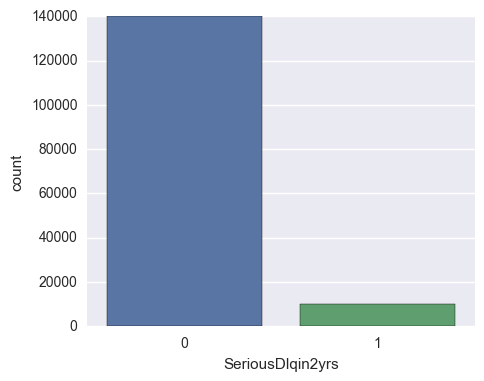

In [27]:
print(y.value_counts(normalize = True))
#6.6 % pozitivna klasa 
sns.countplot(y)

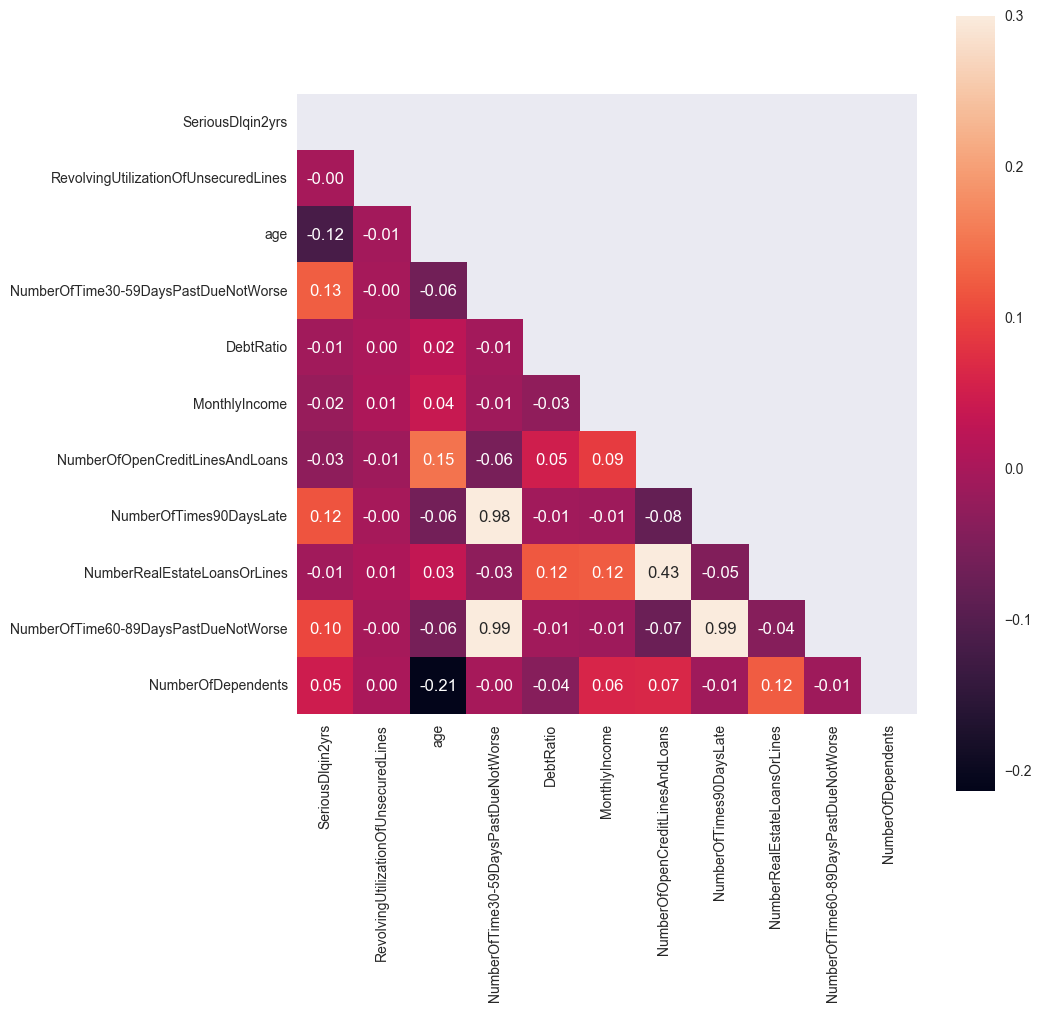

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
corrmatrix = data.corr()
#sns.heatmap(corrmatrix, annot = True,  fmt=".2f")
mask = np.zeros_like(corrmatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  ax = sns.heatmap(corrmatrix, mask=mask, vmax=.3, square=True,annot = True,  fmt=".2f")

In [29]:
data['NumberOfDependents'].value_counts()
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='most_frequent')
imputer.fit(data[['NumberOfDependents']])
data['NumberOfDependents'] = imputer.transform(data[['NumberOfDependents']]).ravel()

data['MonthlyIncome'].fillna(0,inplace = True)

In [30]:
data.groupby(['SeriousDlqin2yrs']).describe()
#DebtRatio,RevolvingUtilization 

DebtRatio  MonthlyIncome  NumberOfDependents  \
SeriousDlqin2yrs                                                           
0                count  139974.000000   1.399740e+05       139974.000000   
                 mean      357.151168   5.395031e+03            0.723527   
                 std      2083.282060   1.351831e+04            1.097576   
                 min         0.000000   0.000000e+00            0.000000   
                 25%         0.173707   1.500000e+03            0.000000   
                 50%         0.362659   4.416000e+03            0.000000   
                 75%         0.865608   7.500000e+03            1.000000   
                 max    329664.000000   3.008750e+06           20.000000   
1                count   10026.000000   1.002600e+04        10026.000000   
                 mean      295.121066   4.693479e+03            0.931279   
                 std      1238.360283   6.012370e+03            1.214938   
                 min         0.000000   0.000000e+00            0.000000   
                 25%         0.193979   1.889500e+03            0.000000   
                 50%         0.428227   3.857000e+03            0.000000   
                 75%         0.892371   6.200000e+03            2.000000   
                 max     38793.000000   2.500000e+05            8.000000   

                        NumberOfOpenCreditLinesAndLoans  \
SeriousDlqin2yrs                                          
0                count                    139974.000000   
                 mean                          8.493620   
                 std                           5.105229   
                 min                           0.000000   
                 25%                           5.000000   
                 50%                           8.000000   
                 75%                          11.000000   
                 max                          58.000000   
1                count                     10026.000000   
                 mean                          7.882306   
                 std                           5.653601   
                 min                           0.000000   
                 25%                           4.000000   
                 50%                           7.000000   
                 75%                          11.000000   
                 max                          57.000000   

                        NumberOfTime30-59DaysPastDueNotWorse  \
SeriousDlqin2yrs                                               
0                count                         139974.000000   
                 mean                               0.280109   
                 std                                2.946075   
                 min                                0.000000   
                 25%                                0.000000   
                 50%                                0.000000   
                 75%                                0.000000   
                 max                               98.000000   
1                count                          10026.000000   
                 mean                               2.388490   
                 std                               11.734510   
                 min                                0.000000   
                 25%                                0.000000   
                 50%                                0.000000   
                 75%                                2.000000   
                 max                               98.000000   

                        NumberOfTime60-89DaysPastDueNotWorse  \
SeriousDlqin2yrs                                               
0                count                         139974.000000   
                 mean                               0.126666   
                 std                                2.900930   
                 min                                0.000000   
                 25%                                0.00000

In [31]:
print(pd.crosstab(data['SeriousDlqin2yrs'],data['NumberOfTimes90DaysLate']))
print(pd.crosstab(data['SeriousDlqin2yrs'],data['NumberOfTime30-59DaysPastDueNotWorse']))
pd.crosstab(data['SeriousDlqin2yrs'],data['NumberOfTime60-89DaysPastDueNotWorse'])

NumberOfTimes90DaysLate      0     1    2    3    4   5   6   7   8   9   10  \
SeriousDlqin2yrs                                                               
0                        135108  3478  779  282   96  48  32   7   6   5   3   
1                          6554  1765  776  385  195  83  48  31  15  14   5   

NumberOfTimes90DaysLate  11  12  13  14  15  17  96   98  
SeriousDlqin2yrs                                          
0                         2   1   2   1   2   0   1  121  
1                         3   1   2   1   0   1   4  143  
NumberOfTime30-59DaysPastDueNotWorse      0      1     2     3    4    5   6   \
SeriousDlqin2yrs                                                                
0                                     120977  13624  3379  1136  429  188  66   
1                                       5041   2409  1219   618  318  154  74   

NumberOfTime30-59DaysPastDueNotWorse  7   8   9   10  11  12  13  96   98  
SeriousDlqin2yrs                          

NumberOfTime60-89DaysPastDueNotWorse,0,1,2,3,4,5,6,7,8,9,11,96,98
SeriousDlqin2yrs,,,,,,,,,,,,,
0,135140,3954,557,138,40,13,4,4,1,1,0,1,121
1,7256,1777,561,180,65,21,12,5,1,0,1,4,143


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
17980,0,1.0,35,98,0.0,1700.0,1,98,0,98,1.0
121885,1,1.0,44,98,0.0,6283.0,1,98,0,98,2.0


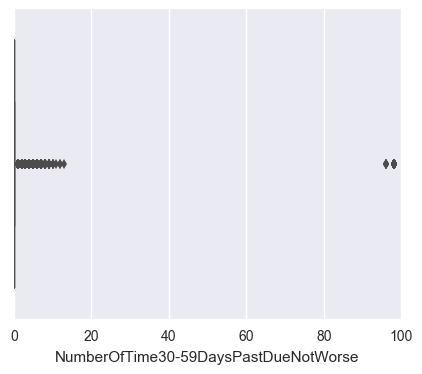

In [32]:
sns.boxplot(data['NumberOfTime30-59DaysPastDueNotWorse'])
data[(data['NumberOfTime30-59DaysPastDueNotWorse'] == 98)& ((data['NumberOfOpenCreditLinesAndLoans']>0) | (data['NumberRealEstateLoansOrLines']>0))]

In [33]:
data.loc[data['NumberOfTimes90DaysLate'] == 96, 'NumberOfTimes90DaysLate'] = 0
data.loc[data['NumberOfTime30-59DaysPastDueNotWorse'] == 96, 'NumberOfTime30-59DaysPastDueNotWorse'] = 0
data.loc[data['NumberOfTime60-89DaysPastDueNotWorse'] == 96, 'NumberOfTime60-89DaysPastDueNotWorse'] = 0

data.loc[data['NumberOfTimes90DaysLate'] == 98, 'NumberOfTimes90DaysLate'] = 0
data.loc[data['NumberOfTime30-59DaysPastDueNotWorse'] == 98, 'NumberOfTime30-59DaysPastDueNotWorse'] = 0
data.loc[data['NumberOfTime60-89DaysPastDueNotWorse'] == 98, 'NumberOfTime60-89DaysPastDueNotWorse'] = 0

In [34]:
print(pd.crosstab(data['SeriousDlqin2yrs'],data['NumberOfTimes90DaysLate']))
print(pd.crosstab(data['SeriousDlqin2yrs'],data['NumberOfTime30-59DaysPastDueNotWorse']))
pd.crosstab(data['SeriousDlqin2yrs'],data['NumberOfTime60-89DaysPastDueNotWorse'])

NumberOfTimes90DaysLate      0     1    2    3    4   5   6   7   8   9   10  \
SeriousDlqin2yrs                                                               
0                        135230  3478  779  282   96  48  32   7   6   5   3   
1                          6701  1765  776  385  195  83  48  31  15  14   5   

NumberOfTimes90DaysLate  11  12  13  14  15  17  
SeriousDlqin2yrs                                 
0                         2   1   2   1   2   0  
1                         3   1   2   1   0   1  
NumberOfTime30-59DaysPastDueNotWorse      0      1     2     3    4    5   6   \
SeriousDlqin2yrs                                                                
0                                     121099  13624  3379  1136  429  188  66   
1                                       5188   2409  1219   618  318  154  74   

NumberOfTime30-59DaysPastDueNotWorse  7   8   9   10  11  12  13  
SeriousDlqin2yrs                                                  
0                   

NumberOfTime60-89DaysPastDueNotWorse,0,1,2,3,4,5,6,7,8,9,11
SeriousDlqin2yrs,,,,,,,,,,,
0,135262,3954,557,138,40,13,4,4,1,1,0
1,7403,1777,561,180,65,21,12,5,1,0,1


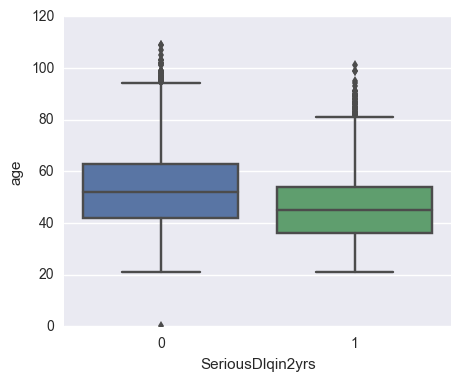

In [35]:
#sns.countplot(x='race',hue='salary',data=data)
sns.boxplot(x='SeriousDlqin2yrs',y='age',data=data)


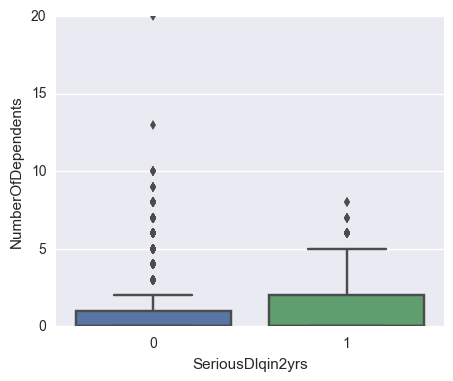

In [36]:
sns.boxplot(x='SeriousDlqin2yrs',y='NumberOfDependents',data=data)

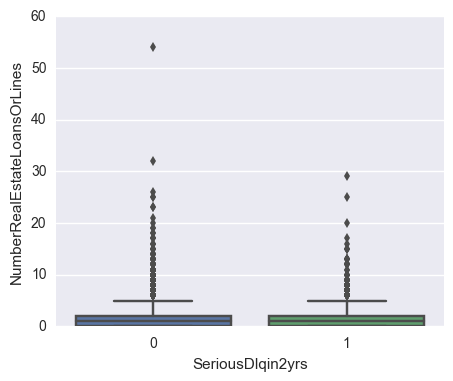

In [37]:
sns.boxplot(x='SeriousDlqin2yrs', y='NumberRealEstateLoansOrLines', data=data)

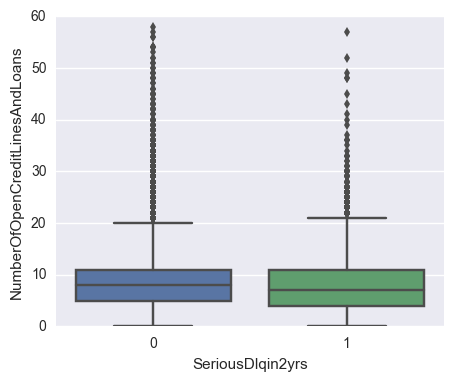

In [38]:
sns.boxplot(x='SeriousDlqin2yrs', y='NumberOfOpenCreditLinesAndLoans', data=data)

In [39]:
data['MonthlyOutcome'] = data['MonthlyIncome'] * data['DebtRatio']

In [40]:
data['Balance'] = data['MonthlyIncome'] - data['MonthlyOutcome']


In [22]:
#data['age_group'] = pd.cut(data['age'], [0,44, 65,110],labels = ['young','middle-age','senior'])

In [20]:
#age_group_ranks = pd.get_dummies(data['age_group'])
#data = data.join(age_group_ranks)
#data.shape

(150000, 17)

In [41]:
data['WithDependents'] = np.where(data['NumberOfDependents']>0, 1, 0)


In [42]:

data['Working'] = np.where(data['age']<65, 1, 0)


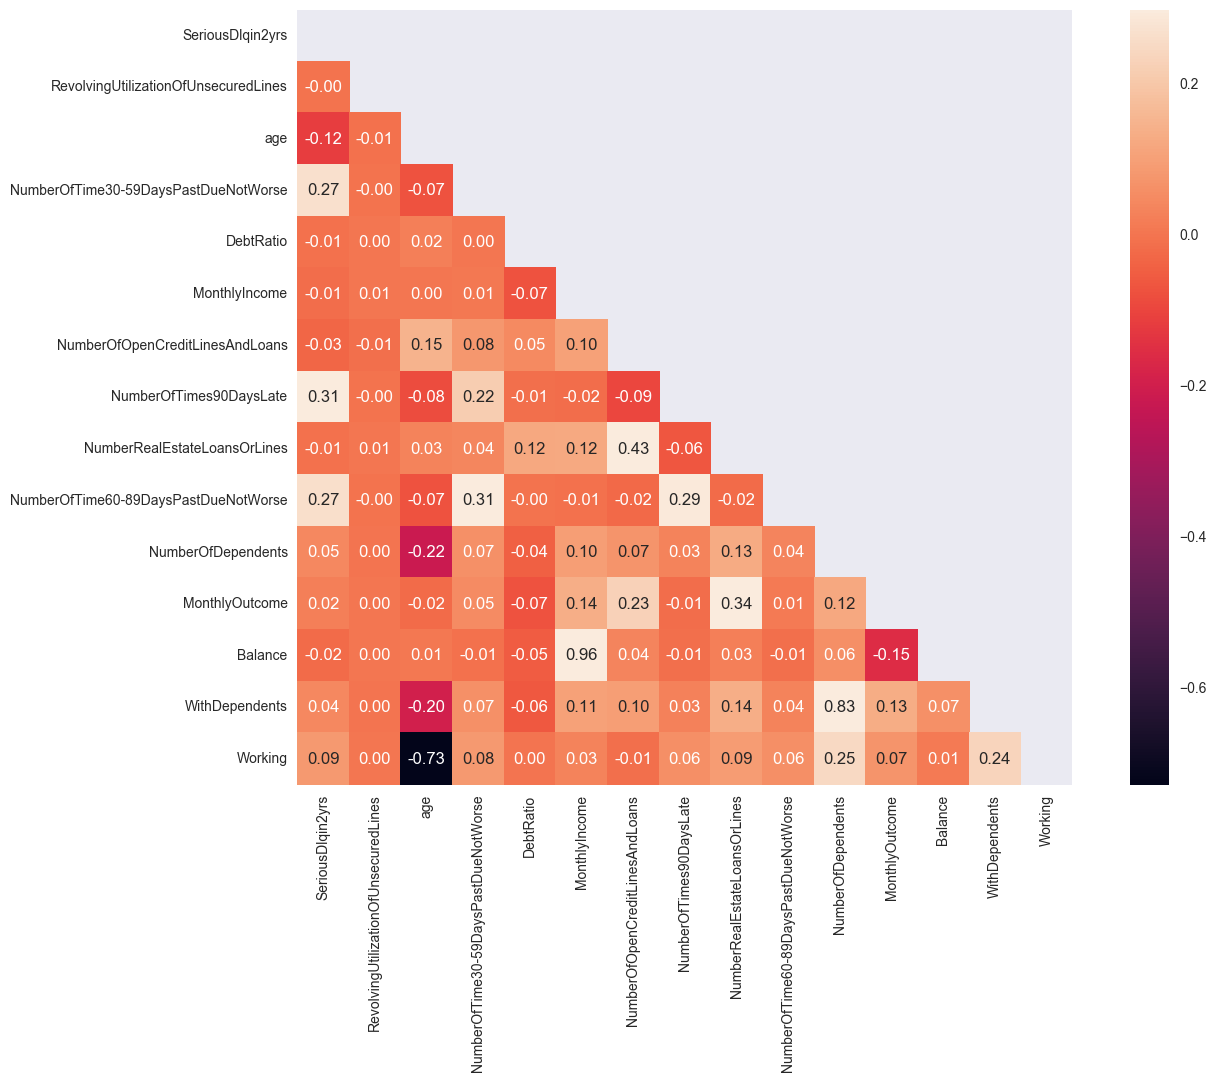

In [43]:
fig, ax = plt.subplots(figsize=(15, 10))
corrmatrix = data.corr()
mask = np.zeros_like(corrmatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corrmatrix, mask=mask, vmax=.3, square=True,annot = True,  fmt=".2f")

In [31]:
pd.crosstab(data['SeriousDlqin2yrs'],data['WithDependents'],normalize = 0)

WithDependents,0,1
SeriousDlqin2yrs,,
0,0.611199,0.388801
1,0.526032,0.473968


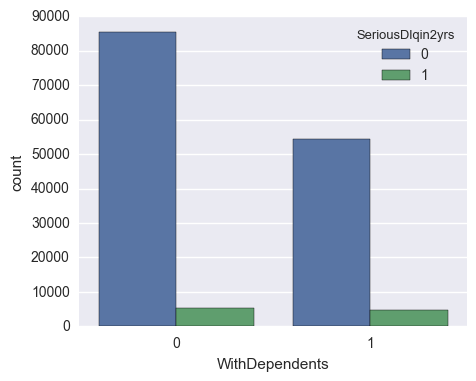

In [32]:
sns.countplot(x='WithDependents', hue='SeriousDlqin2yrs', data=data)

In [33]:
data.groupby(['SeriousDlqin2yrs'])[['Balance','MonthlyOutcome']].agg([np.mean, np.std])

Balance               MonthlyOutcome             
                         mean           std           mean          std
SeriousDlqin2yrs                                                       
0                 3722.318999  13477.540269    1672.711657  3586.216807
1                 2642.469959   8011.734571    2051.008696  6499.383295

In [44]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyOutcome,Balance,WithDependents,Working
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,7323.197016,1796.802984,1,1
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,316.878123,2283.121877,1,1
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,258.914887,2783.085113,0,1
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,118.963951,3181.036049,0,1
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1584.975094,62003.024906,0,1


In [45]:
y = data.iloc[:,0]
df = data.iloc[:,[1,3,4,6,7,8,9,11,12,13,14]]

In [46]:
from sklearn.cross_validation import train_test_split

import warnings
warnings.filterwarnings('ignore')
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 2018)

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train,y_train)
logit_pred = logit.predict(X_test)
print(accuracy_score(y_test, logit_pred))
print(recall_score(y_test, logit_pred))
print(precision_score(y_test, logit_pred))

0.9356666666666666
0.13036193029490617
0.5645863570391872


In [79]:
from sklearn.linear_model import LassoCV
lasso_cv=LassoCV(alphas=[0.001,0.01,0.03,0.05,0.1,0.3,0.5,0.9,1,10]).fit(X_train, y_train)

In [80]:
np.where(np.abs(lasso_cv.coef_)>0)

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10], dtype=int64),)

In [81]:
lasso_cv.alpha_

0.001

,features,coef
0,RevolvingUtilizationOfUnsecuredLines,-2.839522e-06
1,NumberOfTime30-59DaysPastDueNotWorse,6.231968e-02
2,DebtRatio,-4.356322e-07
3,NumberOfOpenCreditLinesAndLoans,-1.142955e-03
4,NumberOfTimes90DaysLate,1.166111e-01
5,NumberRealEstateLoansOrLines,0.000000e+00
6,NumberOfTime60-89DaysPastDueNotWorse,9.980380e-02
7,MonthlyOutcome,9.673517e-07
8,Balance,-3.232048e-07
9,WithDependents,2.867911e-03


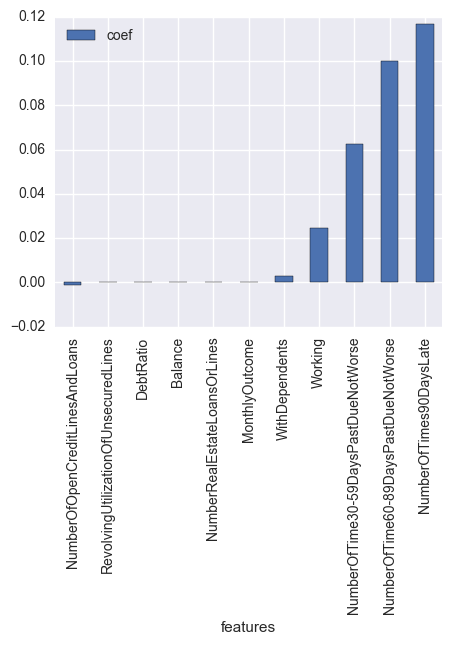

In [84]:
plot_data=pd.DataFrame(X_train.columns,columns=['features'])
plot_data['coef'] = lasso_cv.coef_

plot_data.sort('coef').plot(x=['features'],kind='bar')
plot_data



In [85]:
XtrainLasso = X_train.iloc[:,[0,1,2,3,4,6,7,8,9,10]]
XtestLasso = X_test.iloc[:,[0,1,2,3,4,6,7,8,9,10]]
logitLasso = LogisticRegression()
logitLasso.fit(XtrainLasso,y_train)
logit_predL = logitLasso.predict(XtestLasso)
print(accuracy_score(y_test, logit_predL))
print(recall_score(y_test, logit_predL))
print(precision_score(y_test, logit_predL))

0.9358444444444445
0.1363941018766756
0.5676429567642957


In [96]:
params = [{'C':[0.001,0.01,0.03,0.05,0.1,0.3,0.5,0.9,1,10]}]  #vrednosti parametara koje treba probati
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(penalty='l1'), params, cv=5, scoring='recall')
grid_result  = grid.fit(X_train,y_train)

In [97]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.148536 using {'C': 1}


In [98]:
logit = LogisticRegression(penalty='l1',C=1)
logit.fit(X_train,y_train)
logit_pred = logit.predict(X_test)
print(accuracy_score(y_test, logit_pred))
print(recall_score(y_test, logit_pred))
print(precision_score(y_test, logit_pred))

0.9358
0.13672922252010725
0.565880721220527


In [99]:
logit = LogisticRegression(penalty='l1',C=1,class_weight='balanced',random_state=2018)
logit.fit(X_train,y_train)
logit_pred = logit.predict(X_test)
print(accuracy_score(y_test, logit_pred))
print(recall_score(y_test, logit_pred))
print(precision_score(y_test, logit_pred))

0.8465333333333334
0.6156166219839142
0.2418378093733544


In [102]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 2018)
tree.fit(X_train,y_train)

tree_pred = tree.predict(X_test)
print(accuracy_score(y_test, tree_pred))
print(recall_score(y_test, tree_pred))
print(precision_score(y_test, tree_pred))
print(tree.feature_importances_)

0.8969777777777778
0.2617292225201072
0.24299937772246422
[0.20640399 0.03240333 0.18608864 0.07918047 0.12618367 0.0258376
 0.02775693 0.13236983 0.1561982  0.01921798 0.00835938]


In [126]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

treeSM = make_pipeline(SelectFromModel(DecisionTreeClassifier(),threshold=0.015), DecisionTreeClassifier(random_state = 2018))
treeSM.fit(X_train,y_train)

tree_predSM = treeSM.predict(X_test)

print(accuracy_score(y_test, tree_predSM))
print(recall_score(y_test, tree_predSM))
print(precision_score(y_test, tree_predSM))

0.8980222222222223
0.2640750670241287
0.24772084250235774


In [104]:
param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10,20,50,100]
grid_params_tree = [{'criterion':['gini','entropy'],'max_leaf_nodes':param_range,'max_depth':param_range}]

In [105]:
grid = GridSearchCV(DecisionTreeClassifier(), grid_params_tree, cv=3, scoring='recall')
grid_result = grid.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.175092 using {'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 100}


In [106]:
tree_predict = grid_result.predict(X_test)
print(recall_score(y_test,tree_predict))
print(accuracy_score(y_test, tree_predict))
print(precision_score(y_test, tree_predict))

0.125
0.9353777777777778
0.5567164179104478


In [107]:
from sklearn.utils import resample
data_for_resampling=pd.concat((X_train, y_train), axis=1, join='inner')
negative_mask = (y_train == False)
positive_mask = (y_train == True)

# selekcija pozitivnih i negativnih slučajeva
positives = data_for_resampling[positive_mask]
negatives = data_for_resampling[negative_mask]

# provera broja slučajeva
print(len(positives))
print(len(negatives))

7042
97958


In [115]:
negative_sample=resample(negatives, n_samples=30000, random_state= 2018)
undersampled_df = pd.concat((negative_sample, positives), axis=0)
x_under = undersampled_df.drop('SeriousDlqin2yrs', axis=1)
y_under = undersampled_df['SeriousDlqin2yrs']

In [116]:
tree = DecisionTreeClassifier(random_state = 2018)
tree.fit(x_under,y_under)

tree_pred = tree.predict(X_test)
print(accuracy_score(y_test, tree_pred))
print(recall_score(y_test, tree_pred))
print(precision_score(y_test, tree_pred))


0.8271555555555555
0.4772117962466488
0.18633865480240774


In [118]:
from sklearn.ensemble import RandomForestClassifier
random =  RandomForestClassifier(random_state = 2018)
random.fit(X_train,y_train)

random_pred = random.predict(X_test)

print(accuracy_score(y_test, random_pred))
print(recall_score(y_test, random_pred))
print(precision_score(y_test, random_pred))
print(random.feature_importances_)


0.9321555555555555
0.16521447721179625
0.46729857819905213
[0.1950979  0.05461063 0.18369272 0.09243992 0.0835098  0.02982646
 0.04593242 0.13666548 0.15230084 0.01811734 0.00780649]


In [96]:
randomSM =  make_pipeline(SelectFromModel(RandomForestClassifier(), threshold=0.02),RandomForestClassifier(random_state=2018)) #RandomForestClassifier(random_state = 2018)

randomSM.fit(X_train,y_train)

random_predSM = randomSM.predict(X_test)

print(accuracy_score(y_test, random_predSM))
print(recall_score(y_test, random_predSM))
print(precision_score(y_test, random_predSM))

0.932422222222
0.174597855228
0.47406733394


In [141]:
num_trees = [5,10,20,50,100]
grid_params_rf = [{'n_estimators':num_trees}]
grid = GridSearchCV(RandomForestClassifier(), grid_params_rf, cv=3, scoring='recall')
grid_result = grid.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.212867 using {'n_estimators': 5}


In [142]:

gridPredict = grid_result.predict(X_test)

print(accuracy_score(y_test, gridPredict))
print(recall_score(y_test, gridPredict))
print(precision_score(y_test, gridPredict))

0.927044444444
0.210120643432
0.403734707019


In [119]:
random =  RandomForestClassifier(random_state = 2018,n_estimators=5)
random.fit(x_under,y_under)

random_pred = random.predict(X_test)

print(accuracy_score(y_test, random_pred))
print(recall_score(y_test, random_pred))
print(precision_score(y_test, random_pred))

0.8863777777777778
0.47687667560321717
0.28603015075376886


In [120]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =  GradientBoostingClassifier(random_state = 2018)
gbc.fit(X_train,y_train)

gbc_pred = gbc.predict(X_test)

print(accuracy_score(y_test, gbc_pred))
print(recall_score(y_test, gbc_pred))
print(precision_score(y_test, gbc_pred))



0.9370222222222222
0.17057640750670242
0.586405529953917


In [98]:
print(gbc.feature_importances_)

[ 0.24606993  0.09322103  0.05763617  0.07183897  0.16590825  0.05572746
  0.08377007  0.04828554  0.14452164  0.00753597  0.02548499]


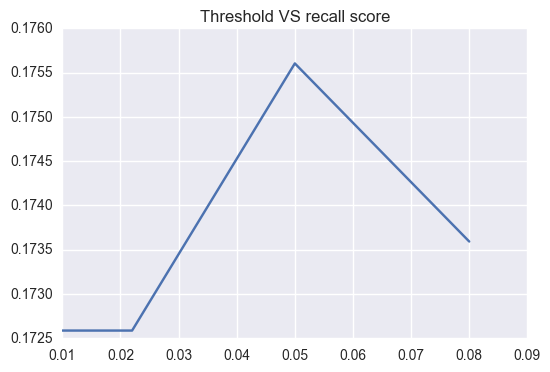

In [123]:
### select from model gradient boosting
select_results = []
alphas = [0.01,0.022,0.05,0.08]
for alp in alphas:
    pipe_select = make_pipeline(SelectFromModel(GradientBoostingClassifier(), threshold=alp),GradientBoostingClassifier(random_state=2018)) 
    pipe_select.fit(X_train,y_train)
    select_pred = pipe_select.predict(X_test)
    select_results.append(recall_score(y_test, select_pred))
    
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(alphas,select_results)
plt.title('Threshold VS recall score')


In [101]:
### select from model gradient boosting
pipe_selectGB = make_pipeline(SelectFromModel(GradientBoostingClassifier(), threshold=0.05),GradientBoostingClassifier(random_state=2018)) 
pipe_selectGB.fit(X_train,y_train)
gbc_predSM = pipe_selectGB.predict(X_test)

print(accuracy_score(y_test, gbc_predSM))
print(recall_score(y_test, gbc_predSM))
print(precision_score(y_test, gbc_predSM))

0.937177777778
0.175603217158
0.58810325477


In [143]:
num_trees = [5,10,20,50,100,150]
grid_params_gb = [{'n_estimators':num_trees}]
grid = GridSearchCV(GradientBoostingClassifier(), grid_params_gb, cv=3, scoring='recall')
grid_result = grid.fit(X_train,y_train  )
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.184323 using {'n_estimators': 150}


In [144]:
grid_predict = grid.predict(X_test)
print(accuracy_score(y_test, grid_predict))
print(recall_score(y_test, grid_predict))
print(precision_score(y_test, grid_predict))

0.937066666667
0.179959785523
0.582429501085


In [124]:
gbc = GradientBoostingClassifier(random_state=2018,n_estimators=150)
gbc.fit(x_under,y_under)

gbc_pred = gbc.predict(X_test)

print(accuracy_score(y_test, gbc_pred))
print(recall_score(y_test, gbc_pred))
print(precision_score(y_test, gbc_pred))

0.9199111111111111
0.44906166219839144
0.40606060606060607
